In [159]:
import numpy as np
import pandas as pd
import math
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,30)
##Sets the plots to be displayed and saved in notebook
%matplotlib inline 



In [2]:
col_name=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income_bracket']

##Import Income training data
income_train = pd.read_csv('q2.csv',names=col_name)
print(income_train.shape)
income_train.head()


(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
##Import Income test data
income_test = pd.read_csv('q2_test.csv',names=col_name)

income_test.dropna(axis=0,inplace=True)
print(income_test.shape)
income_test.head()

(16281, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [4]:
##Finds how '?' is stored in data
s = income_test['workclass'][5]
s

' ?'

In [5]:
##Replaces '?' with Nan value and check how many Nan values
income_train = income_train.replace(s,np.nan)
income_test = income_test.replace(s,np.nan)
print('train',income_train.isnull().sum(),'test',income_test.isnull().sum(),sep='\n')

train
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income_bracket       0
dtype: int64
test
age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income_bracket      0
dtype: int64


#### Null or Nan value are present in Nominal Features and thus thier value cannot be estimated from other entries in data and thus have to be removed<br>

In [6]:
#Drops rows with Nan value in one or more column
income_test.dropna(axis=0,inplace=True)
income_train.dropna(axis=0,inplace=True)
print(income_train.shape,income_test.shape)
print(income_train.isnull().sum(),income_test.isnull().sum(),sep='\n')

(30162, 15) (15060, 15)
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64


income_test.age = income_test.age.astype(int)
income_test.hours_per_week = income_test.hours_per_week.astype(float)

income_train.age = income_train.age.astype(int)
income_train.hours_per_week = income_train.hours_per_week.astype(float)

income_train.head()

In [8]:
##Converts Target value to binary 0,1 for ease in analysis
##'<=50k' is replaced by 0 and '>50k' is replaced by 1
s1=income_test['income_bracket'][1]
s2=income_test['income_bracket'][3]

s3=income_train['income_bracket'][0]
s4=income_train['income_bracket'][215]

income_test.replace(s1,0,inplace=True)
income_test.replace(s2,1,inplace=True)

income_train.replace(s3,0,inplace=True)
income_train.replace(s4,1,inplace=True)


In [9]:
##Reduce no of unique values in nominal feature for ease in analysis

income_test['education'].replace(' Preschool', 'Uneducated',inplace=True)
income_test['education'].replace(' 10th', 'Uneducated',inplace=True)
income_test['education'].replace(' 11th', 'Uneducated',inplace=True)
income_test['education'].replace(' 12th', 'Uneducated',inplace=True)
income_test['education'].replace(' 1st-4th', 'Uneducated',inplace=True)
income_test['education'].replace(' 5th-6th', 'Uneducated',inplace=True)
income_test['education'].replace(' 7th-8th', 'Uneducated',inplace=True)
income_test['education'].replace(' 9th', 'Uneducated',inplace=True)
income_test['education'].replace(' HS-grad', 'Grad',inplace=True)
income_test['education'].replace(' Some-college', 'Grad',inplace=True)
income_test['education'].replace(' Assoc-acdm', 'Grad',inplace=True)
income_test['education'].replace(' Assoc-voc', 'Grad',inplace=True)
income_test['education'].replace(' Prof-school', 'Masters',inplace=True)
income_test['education'].replace(' Bachelors', 'Bachelors',inplace=True)
income_test['education'].replace(' Doctorate', 'Doctorate',inplace=True)
income_test['education'].replace(' Masters', 'Masters',inplace=True)

income_train['education'].replace(' Preschool', 'Uneducated',inplace=True)
income_train['education'].replace(' 10th', 'Uneducated',inplace=True)
income_train['education'].replace(' 11th', 'Uneducated',inplace=True)
income_train['education'].replace(' 12th', 'Uneducated',inplace=True)
income_train['education'].replace(' 1st-4th', 'Uneducated',inplace=True)
income_train['education'].replace(' 5th-6th', 'Uneducated',inplace=True)
income_train['education'].replace(' 7th-8th', 'Uneducated',inplace=True)
income_train['education'].replace(' 9th', 'Uneducated',inplace=True)
income_train['education'].replace(' HS-grad', 'Grad',inplace=True)
income_train['education'].replace(' Some-college', 'Grad',inplace=True)
income_train['education'].replace(' Assoc-acdm', 'Grad',inplace=True)
income_train['education'].replace(' Assoc-voc', 'Grad',inplace=True)
income_train['education'].replace(' Prof-school', 'Masters',inplace=True)
income_train['education'].replace(' Bachelors', 'Bachelors',inplace=True)
income_train['education'].replace(' Doctorate', 'Doctorate',inplace=True)
income_train['education'].replace(' Masters', 'Masters',inplace=True)


##Drop features with either too many categoical values or features with continous values
income_train.drop('native_country',axis='columns',inplace=True)
income_test.drop('native_country',axis='columns',inplace=True)

income_train.drop('age',axis='columns',inplace=True)
income_test.drop('age',axis='columns',inplace=True)

income_train.drop('fnlwgt',axis='columns',inplace=True)
income_test.drop('fnlwgt',axis='columns',inplace=True)

income_train.drop('education_num',axis='columns',inplace=True)
income_test.drop('education_num',axis='columns',inplace=True)

income_train.drop('capital_gain',axis='columns',inplace=True)
income_test.drop('capital_gain',axis='columns',inplace=True)

income_train.drop('capital_loss',axis='columns',inplace=True)
income_test.drop('capital_loss',axis='columns',inplace=True)

income_train.drop('hours_per_week',axis='columns',inplace=True)
income_test.drop('hours_per_week',axis='columns',inplace=True)


In [142]:

def ent(vals): ##Function to calculate entropy
    val_count = Counter(vals)
    epy=0
    for v in val_count:
        p = val_count[v] / len(vals)
        epy -= p * math.log2(p)
    return epy

def info_gain(target, sdatacolval): ##Function to calculate Information Gain
    info_gain = ent(target)
    for s in sdtacolval:
        info_gain -= len(s) * ent(s) / len(target)
    return info_gain

def split(dataset, column): ##Splits the dataset based on value of feature mentioned in column variable
    split_data = []
    col_vals = income_train[column].unique()
    for col_val in col_vals:
        split_data.append(dataset[dataset[column] == col_val])
    return(split_data)

def child_split(dataset,column): ##Splits the dataset into n parts after splitting feature is decided where n is no of unique values of splitting feature
    child=[]
    split_data=[]
    col_vals = income_train[column].unique()
    for col_val in col_vals:
        split_data.append([col_val,dataset[dataset[column] == col_val]])
    for s in split_data:
        child.append([s[0],s[1].drop(column,axis='columns')])
    return child
        

def bsplit(dataset): ##Calculates Information Gain for each feature and then chooses best feature for splitting.
    maxgain = 0
    bestfeature = 0
    features = list(dataset.columns)
    features.remove('income_bracket')
    for feature in features:
        sdata = split(dataset, feature)
        sdatacolval = [dataframe['income_bracket'] for dataframe in sdata]
        gain = information_gain(dataset['income_bracket'], sdatacolval)
        if gain<=0:
            return None
        if gain > maxgain:
            maxgain, bestfeature = gain, feature

    return bestfeature, maxgain


In [143]:
class Node:

    def __init__( self, depth = 0, stump = (0,0)):
        self.depth = depth
        self.stump = stump
        self.child = {}
        self.isLeaf = True
        self.value = 0
        
    def predict( self, data ): Predicts target value
        
        if self.isLeaf: ##if current node is leaf node then its value is predicted 
            return self.value
        else:    ##Else node's child with value same as value of test point spliiting feature of parent node
            return self.child[data[self.stump[0]]].predict( data )
           
    
    def getStump(self,dataset): ##Gets the splitting criteria and data splits based on unique values of splitting feature
        best_split = bsplit(dataset)
        if best_split == None :
            return None
        data = child_split(dataset, best_split[0])            
        return (best_split[0],data)
        
    def train(self, X, y, maxLeafSize, maxDepth ):

        if y.size < maxLeafSize or self.depth >= maxDepth:
            self.isLeaf = True
            self.value = np.mean( y )
        else:
            
            self.stump = self.getStump(X)
            
            if self.stump == None :
                self.isLeaf = True
                self.value = np.mean(y)
            
            else:
                
                self.isLeaf = False
                for d in self.stump[1]:
                    self.child[d[0]] = Node(depth = self.depth + 1)
                    self.child[d[0]].train( d[1], d[1]['income_bracket'], maxLeafSize, maxDepth )
    
    def printnode(self): Prints Decision flow
        i = '\t'*self.depth
        j = '\t'*(self.depth+1)
        if self.stump != None:
            print(i,self.stump[0])
            if len(self.child) != 0:
                for c in self.child:
                    print(j,c)
                    self.child[c].printnode()
                    print()

class Tree:
    def __init__( self, maxLeafSize = 10, maxDepth = 5 ):
        self.root = Node()
        self.maxLeafSize = maxLeafSize
        self.maxDepth = maxDepth 
        
    def predict( self, xt ):
        p=[]
        for xid ,x in xt.iterrows():
            p.append(self.root.predict(x))
            
        return p
    
    def train( self, X, y ):
        self.root.train( X, y, self.maxLeafSize, self.maxDepth )
    
    def printtree(self,n):
        self.root.printnode()





In [172]:
DT = Tree( maxLeafSize = 500, maxDepth = 3 )
DT.train( income_train, income_train['income_bracket'] )
DT.printtree(DT.root)

 relationship
	  Not-in-family
	 education
		 Bachelors
		 occupation
			  Adm-clerical
			 0

			  Exec-managerial
			 0

			  Handlers-cleaners
			 0

			  Prof-specialty
			 0

			  Other-service
			 0

			  Sales
			 0

			  Transport-moving
			 0

			  Farming-fishing
			 0

			  Machine-op-inspct
			 0

			  Tech-support
			 0

			  Craft-repair
			 0

			  Protective-serv
			 0

			  Armed-Forces
			 0

			  Priv-house-serv
			 0


		 Grad
		 occupation
			  Adm-clerical
			 0

			  Exec-managerial
			 0

			  Handlers-cleaners
			 0

			  Prof-specialty
			 0

			  Other-service
			 0

			  Sales
			 0

			  Transport-moving
			 0

			  Farming-fishing
			 0

			  Machine-op-inspct
			 0

			  Tech-support
			 0

			  Craft-repair
			 0

			  Protective-serv
			 0

			  Armed-Forces
			 0

			  Priv-house-serv
			 0


		 Uneducated
		 occupation
			  Adm-clerical
			 0

			  Exec-managerial
			 0

			  Handlers-cleaners
			 0

			  Prof-specialty
			 0

			  Other-service
			 0

### Each indent level specifies the depth at which feature is being used for split

### Value followed by zero in next line indicates previous value was leaf node

In [173]:

col = list(income_test.columns)
col.remove('income_bracket')
pred = DT.predict(income_test[col])

actual = np.array(income_test['income_bracket'])
pred = np.array(pred)

pred=np.around(pred,decimals=0)

pred=np.int64(pred)

pred = np.where(pred < 0, 0, pred)

error=np.abs(pred-actual)

print(np.sum(error)/len(error))


0.1794156706507304


## OBSERVATION

### Error rate of above trained Decision Tree model on given test dataset is 17.92%

### Accuracy of above trained Decision Tree model on given test dataset is 82.08%

# Cross Validation

In [158]:
#We will use 10 fold Cross Validation
income = pd.concat([income_train,income_test])
error_depth={}

for d in range(1,8):
    error_maxleaf={}
    for maxleaf in range(500,1501,200):
        error=[]
        for k in range(10):
            val_data = income[int(4522.2*k):int(4522.2*k)+4522]
            train_data = pd.concat([income[0:int(4522.2*k)],income[int(4522.2*k)+4522:]])
            DT = Tree( maxLeafSize = maxleaf, maxDepth = d )
            DT.train( train_data, train_data['income_bracket'] )
            col = list(income_test.columns)
            col.remove('income_bracket')
            pred = DT.predict(val_data[col])

            actual = np.array(val_data['income_bracket'])
            pred = np.array(pred)

            pred=np.around(pred,decimals=0)

            pred=np.int64(pred)

            pred = np.where(pred < 0, 0, pred)

            error.append(np.sum(np.abs(pred-actual)/len(pred)))
            print(k)
        
        error_maxleaf[maxleaf]=np.average(np.array(error))
        print(maxleaf)
    
    error_depth[d]=error_maxleaf
    print(d)
    
print(error_depth)

            
            


0
1
2
3
4
5
6
7
8
9
500
0
1
2
3
4
5
6
7
8
9
700
0
1
2
3
4
5
6
7
8
9
900
0
1
2
3
4
5
6
7
8
9
1100
0
1
2
3
4
5
6
7
8
9
1300
0
1
2
3
4
5
6
7
8
9
1500
1
0
1
2
3
4
5
6
7
8
9
500
0
1
2
3
4
5
6
7
8
9
700
0
1
2
3
4
5
6
7
8
9
900
0
1
2
3
4
5
6
7
8
9
1100
0
1
2
3
4
5
6
7
8
9
1300
0
1
2
3
4
5
6
7
8
9
1500
2
0
1
2
3
4
5
6
7
8
9
500
0
1
2
3
4
5
6
7
8
9
700
0
1
2
3
4
5
6
7
8
9
900
0
1
2
3
4
5
6
7
8
9
1100
0
1
2
3
4
5
6
7
8
9
1300
0
1
2
3
4
5
6
7
8
9
1500
3
0
1
2
3
4
5
6
7
8
9
500
0
1
2
3
4
5
6
7
8
9
700
0
1
2
3
4
5
6
7
8
9
900
0
1
2
3
4
5
6
7
8
9
1100
0
1
2
3
4
5
6
7
8
9
1300
0
1
2
3
4
5
6
7
8
9
1500
4
0
1
2
3
4
5
6
7
8
9
500
0
1
2
3
4
5
6
7
8
9
700
0
1
2
3
4
5
6
7
8
9
900
0
1
2
3
4
5
6
7
8
9
1100
0
1
2
3
4
5
6
7
8
9
1300
0
1
2
3
4
5
6
7
8
9
1500
5
0
1
2
3
4
5
6
7
8
9
500
0
1
2
3
4
5
6
7
8
9
700
0
1
2
3
4
5
6
7
8
9
900
0
1
2
3
4
5
6
7
8
9
1100
0
1
2
3
4
5
6
7
8
9
1300
0
1
2
3
4
5
6
7
8
9
1500
6
0
1
2
3
4
5
6
7
8
9
500
0
1
2
3
4
5
6
7
8
9
700
0
1
2
3
4
5
6
7
8
9
900
0
1
2
3
4
5
6
7
8
9
1100
0
1
2
3
4

[24.78328173 24.78328173 24.78328173 24.78328173 24.78328173 24.78328173]
[19.00044228 19.00044228 19.00044228 19.00044228 19.00044228 19.00044228]
[18.5979655  18.5979655  18.56479434 18.56479434 18.56479434 18.56479434]
[18.49402919 18.50729766 18.47191508 18.47191508 18.55816011 18.55816011]
[18.50066342 18.51393189 18.47191508 18.47191508 18.55816011 18.55816011]
[18.50066342 18.51393189 18.47191508 18.47191508 18.55816011 18.55816011]
[18.50066342 18.51393189 18.47191508 18.47191508 18.55816011 18.55816011]
18.471915081822203 3 900


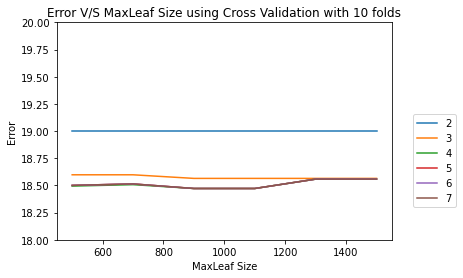

In [171]:
fig , ax = plt.subplots(1)

min1=[]
for d in range(1,8):
    
    values=np.array([x*100 for x in error_depth[d].values()])
    print(values)
    keys=[k for k in error_depth[d].keys()]
    if(d!=1):
        ax.plot(keys, values,label=d)
    min1.append([values.min(),keys[list(values).index(values.min())]])
    
ax.set_xlabel('MaxLeaf Size')
ax.set_ylabel('Error')
ax.set_ylim(18,20)
ax.set_title('Error V/S MaxLeaf Size using Cross Validation with 10 folds')
ax.legend(bbox_to_anchor = (1.05, 0.6))

minimum=100
depth=maxleaf=0
for m in min1:
    if(m[0]<minimum):
        minimum=m[0]
        depth ,maxleaf = min1.index(m) , m[1]

print(minimum,depth,maxleaf) 


## Conclusions

#### As can be seen from output printed and graph plotted that Error remains nearly same and then becomes equal for Hyperparameter Max Depth value from 4 to 7

#### Changing MaxLeaf Size has very insignificant impact on Error in case of our model

#### Error for Max Depth = 1 is 24.783% irrespective of MaxLeaf Size as is significantly higher than Error of other Max Depth values , so it is not shown in graph

#### Error for Max Depth = 2 is 19.001 and also remains invariant towards value of MaxLeaf Size

#### We get Best Model performance for Max Depth = 3 and MaxLeaf Size = 900 with Error of 18.472%